## imports

In [2]:
from pyforest import* #this will import everything we need
lazy_imports() #this will show all the import 

['import keras',
 'import plotly.express as px',
 'from sklearn.ensemble import GradientBoostingRegressor',
 'import torch',
 'from sklearn import svm',
 'from pyspark import SparkContext',
 'from sklearn.linear_model import LogisticRegression',
 'from sklearn.preprocessing import LabelEncoder',
 'from sklearn.linear_model import Ridge',
 'import tensorflow as tf',
 'from scipy import stats',
 'from sklearn.impute import SimpleImputer',
 'import dash',
 'import spacy',
 'from sklearn.feature_extraction.text import CountVectorizer',
 'import os',
 'from sklearn.preprocessing import StandardScaler',
 'import xgboost as xgb',
 'import bokeh',
 'import pickle',
 'import altair as alt',
 'import skimage',
 'import imutils',
 'from sklearn.preprocessing import OneHotEncoder',
 'import datetime as dt',
 'import statistics',
 'from sklearn.model_selection import StratifiedKFold',
 'import gensim',
 'import sklearn',
 'from sklearn.manifold import TSNE',
 'from scipy import signal as sg',
 'fro

## Loading Dataset

In [3]:
df = pd.read_csv("diabetes_dataset.csv")
df

<IPython.core.display.Javascript object>

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0              6      148             72             35        0  33.6   
1              1       85             66             29        0  26.6   
2              8      183             64              0        0  23.3   
3              1       89             66             23       94  28.1   
4              0      137             40             35      168  43.1   
..           ...      ...            ...            ...      ...   ...   
763           10      101             76             48      180  32.9   
764            2      122             70             27        0  36.8   
765            5      121             72             23      112  26.2   
766            1      126             60              0        0  30.1   
767            1       93             70             31        0  30.4   

     DiabetesPedigreeFunction  Age  Outcome  
0                       0.627   50        1  
1                       0.351   31        0  
2                       0.672   32        1  
3                       0.167   21        0  
4                       2.288   33        1  
..                        ...  ...      ...  
763                     0.171   63        0  
764                     0.340   27        0  
765                     0.245   30        0  
766                     0.349   47        1  
767                     0.315   23        0  

[768 rows x 9 columns]

In [4]:
df.shape

(768, 9)

In [5]:
df.head()

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1

# Note: 
#     1 == Diabetic
#     0 == Not Dieabetic
    

## Checking for null or NaN values

In [6]:
df.isna().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

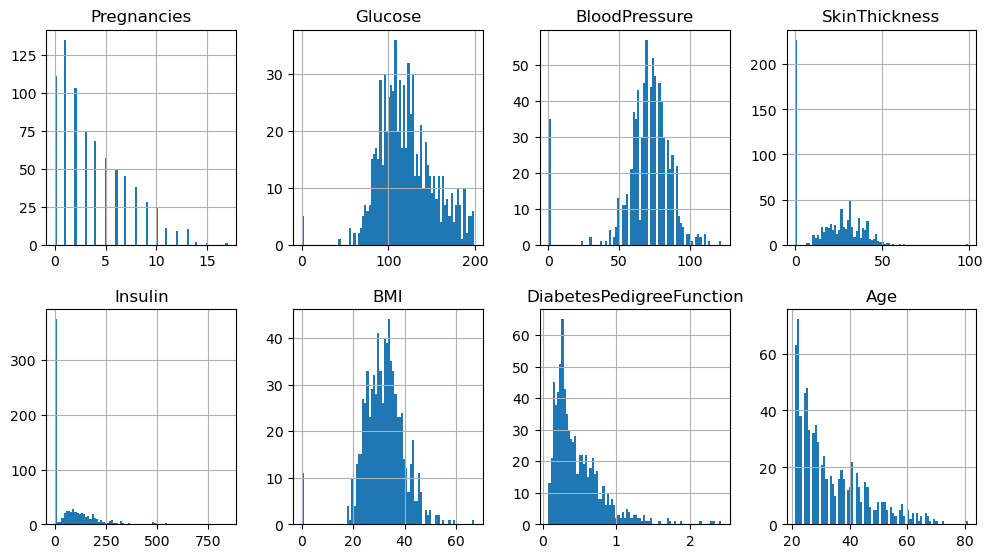

In [7]:
columns = list(df)[0:-1]
df[columns].hist(bins=80,figsize=(12,50), layout = (14,4));

## Identify correlation in data

In [8]:
df.corr() # It will show correlation matrix

Pregnancies   Glucose  BloodPressure  SkinThickness  \
Pregnancies                  1.000000  0.129459       0.141282      -0.081672   
Glucose                      0.129459  1.000000       0.152590       0.057328   
BloodPressure                0.141282  0.152590       1.000000       0.207371   
SkinThickness               -0.081672  0.057328       0.207371       1.000000   
Insulin                     -0.073535  0.331357       0.088933       0.436783   
BMI                          0.017683  0.221071       0.281805       0.392573   
DiabetesPedigreeFunction    -0.033523  0.137337       0.041265       0.183928   
Age                          0.544341  0.263514       0.239528      -0.113970   
Outcome                      0.221898  0.466581       0.065068       0.074752   

                           Insulin       BMI  DiabetesPedigreeFunction  \
Pregnancies              -0.073535  0.017683                 -0.033523   
Glucose                   0.331357  0.221071                  0.137337   
BloodPressure             0.088933  0.281805                  0.041265   
SkinThickness             0.436783  0.392573                  0.183928   
Insulin                   1.000000  0.197859                  0.185071   
BMI                       0.197859  1.000000                  0.140647   
DiabetesPedigreeFunction  0.185071  0.140647                  1.000000   
Age                      -0.042163  0.036242                  0.033561   
Outcome                   0.130548  0.292695                  0.173844   

                               Age   Outcome  
Pregnancies               0.544341  0.221898  
Glucose                   0.263514  0.466581  
BloodPressure             0.239528  0.065068  
SkinThickness            -0.113970  0.074752  
Insulin                  -0.042163  0.130548  
BMI                       0.036242  0.292695  
DiabetesPedigreeFunction  0.033561  0.173844  
Age                       1.000000  0.238356  
Outcome                   0.238356  1.000000

# Plotting correlation heatmap

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

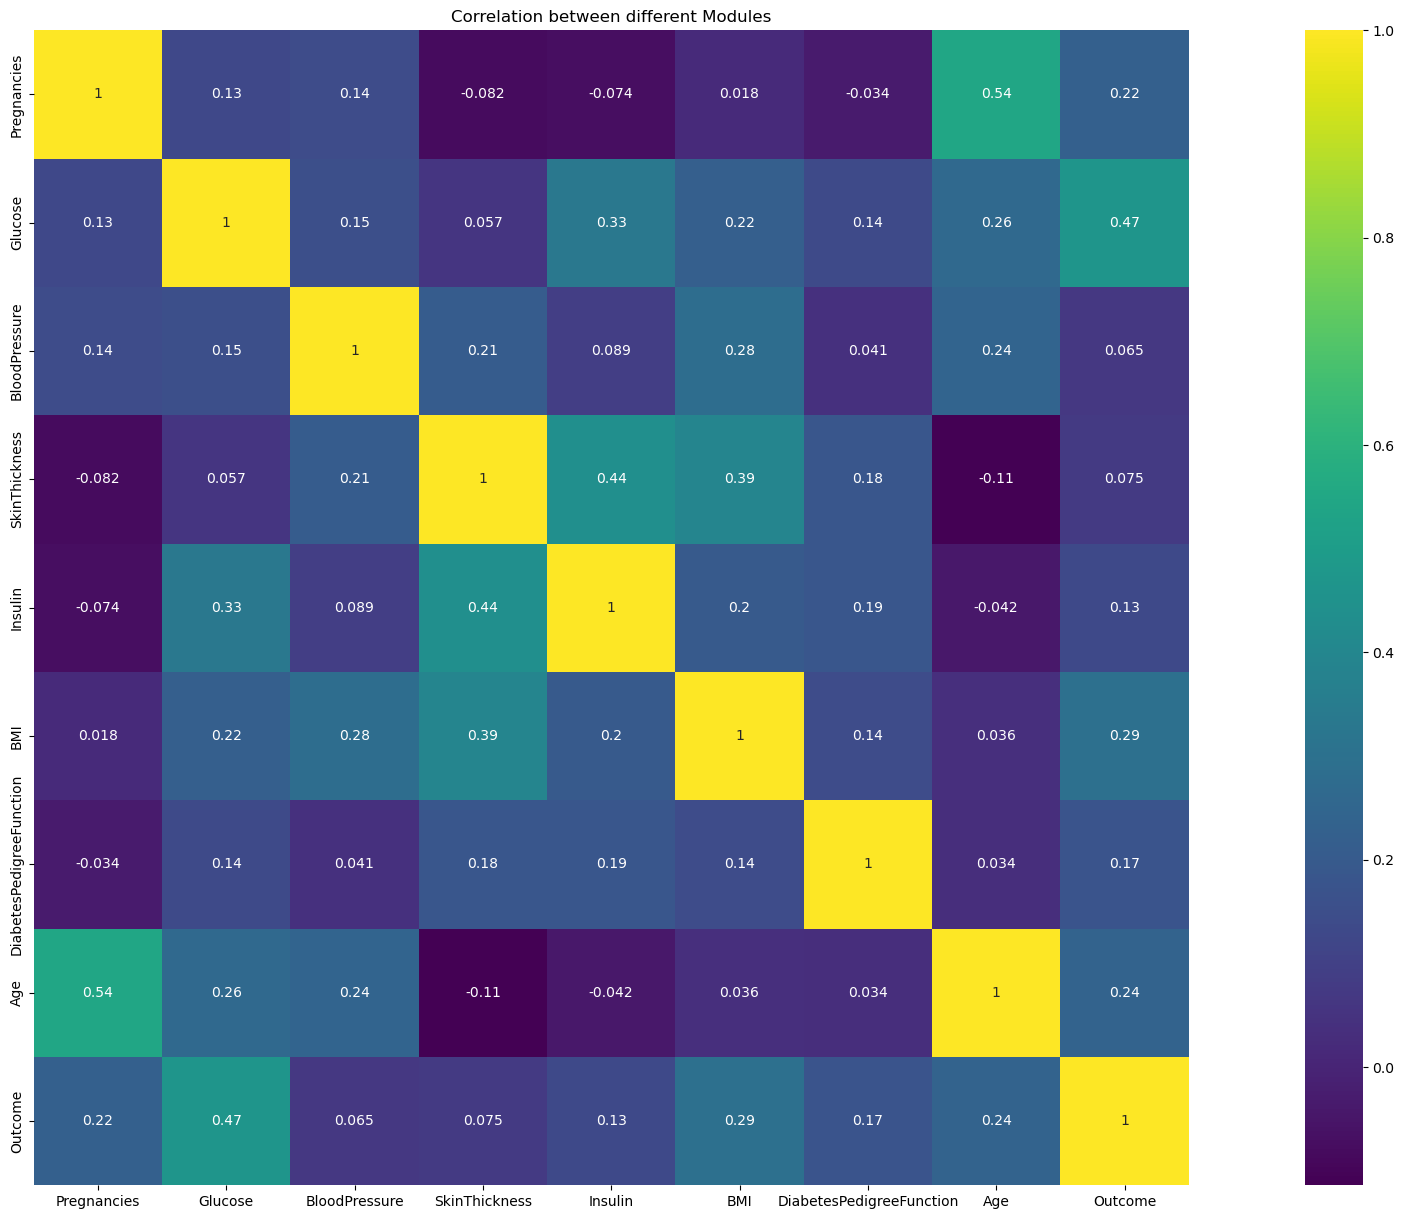

In [9]:
plt.figure(figsize = (30,15))
sns.heatmap(df.corr(), vmax = 1, square = True, annot = True, cmap = 'viridis');
plt.title('Correlation between different Modules');

<IPython.core.display.Javascript object>

D:\Data_Science\project_3\env\lib\site-packages\seaborn\axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


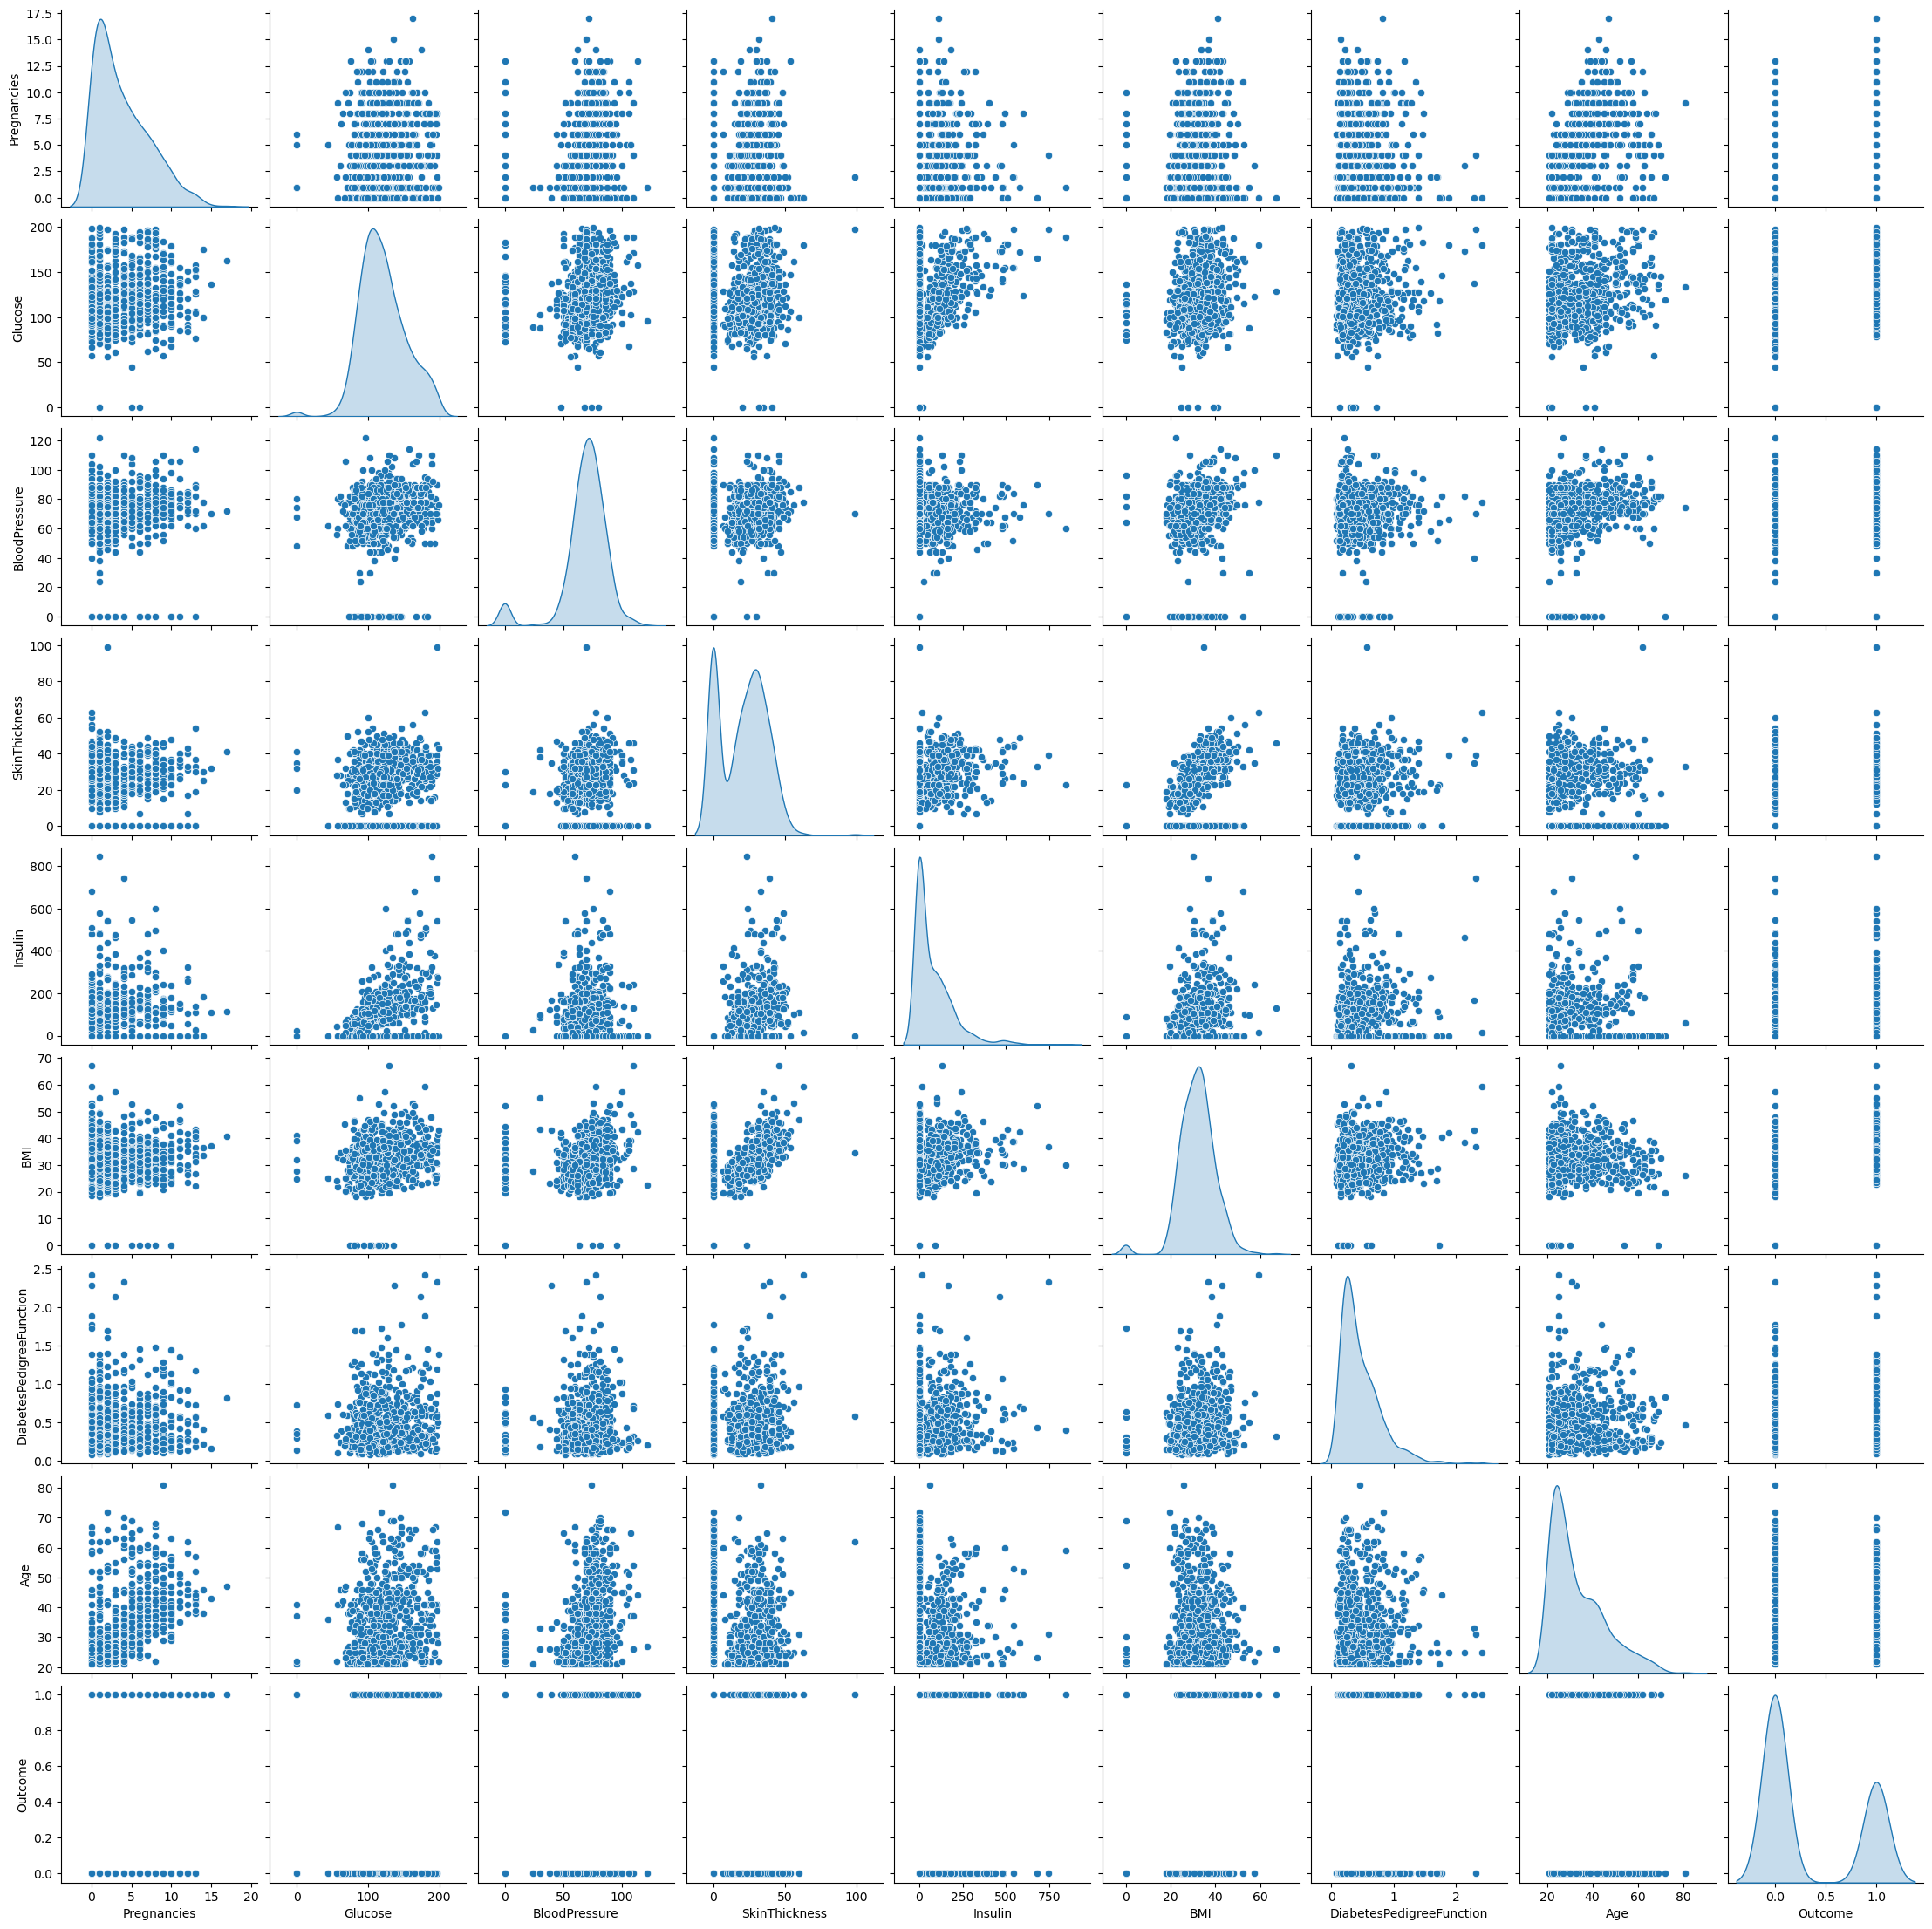

In [10]:
sns.pairplot(df,diag_kind = 'kde');
# or 
# sns.pairplot(df) #  we will get histogram insted of curve graph

In [11]:
df['Outcome'].value_counts()

Outcome
0    500
1    268
Name: count, dtype: int64

# 0 == Not diabetic Patient
# 1 == Diabetic Patient

In [12]:
df.head()

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1

## Spliting the Data # 70% for Training:30% for Testing  

In [13]:
X = df.drop('Outcome', axis = 1)
y = df['Outcome']

In [14]:
x_train, x_test, y_train, y_test = train_test_split(X,y, random_state=1,train_size=0.7)

<IPython.core.display.Javascript object>

In [15]:
x_train.head()

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
88            15      136             70             32      110  37.1   
467            0       97             64             36      100  36.8   
550            1      116             70             28        0  27.4   
147            2      106             64             35      119  30.5   
481            0      123             88             37        0  35.2   

     DiabetesPedigreeFunction  Age  
88                      0.153   43  
467                     0.600   25  
550                     0.204   21  
147                     1.400   34  
481                     0.197   29

# we can see lost of 0(Zeros or we can say NaN values). 
# replacing Zeros with mean

In [16]:
replace_zeros = SimpleImputer(missing_values=0, strategy='mean')
cols = x_train.columns

x_train = pd.DataFrame(replace_zeros.fit_transform(x_train))
x_test = pd.DataFrame(replace_zeros.fit_transform(x_test))

x_train.columns = cols
x_test.columns = cols

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [17]:
x_train.head()

Pregnancies  Glucose  BloodPressure  SkinThickness     Insulin   BMI  \
0    15.000000    136.0           70.0           32.0  110.000000  37.1   
1     4.396514     97.0           64.0           36.0  100.000000  36.8   
2     1.000000    116.0           70.0           28.0  158.243346  27.4   
3     2.000000    106.0           64.0           35.0  119.000000  30.5   
4     4.396514    123.0           88.0           37.0  158.243346  35.2   

   DiabetesPedigreeFunction   Age  
0                     0.153  43.0  
1                     0.600  25.0  
2                     0.204  21.0  
3                     1.400  34.0  
4                     0.197  29.0

# Logistic Regression Module

    # fit the model on Training

In [18]:
model = LogisticRegression(solver='liblinear')
model.fit(x_train, y_train)

<IPython.core.display.Javascript object>

LogisticRegression(solver='liblinear')

In [19]:
x_train.head()

Pregnancies  Glucose  BloodPressure  SkinThickness     Insulin   BMI  \
0    15.000000    136.0           70.0           32.0  110.000000  37.1   
1     4.396514     97.0           64.0           36.0  100.000000  36.8   
2     1.000000    116.0           70.0           28.0  158.243346  27.4   
3     2.000000    106.0           64.0           35.0  119.000000  30.5   
4     4.396514    123.0           88.0           37.0  158.243346  35.2   

   DiabetesPedigreeFunction   Age  
0                     0.153  43.0  
1                     0.600  25.0  
2                     0.204  21.0  
3                     1.400  34.0  
4                     0.197  29.0

In [20]:
x_test.head()

Pregnancies  Glucose  BloodPressure  SkinThickness     Insulin   BMI  \
0          7.0    136.0           74.0          26.00  135.000000  26.0   
1          1.0    151.0           60.0          30.16  150.137405  26.1   
2          6.0    109.0           60.0          27.00  150.137405  25.0   
3          3.0     61.0           82.0          28.00  150.137405  34.4   
4          1.0    116.0           78.0          29.00  180.000000  36.1   

   DiabetesPedigreeFunction   Age  
0                     0.647  51.0  
1                     0.179  22.0  
2                     0.206  27.0  
3                     0.243  46.0  
4                     0.496  25.0

In [21]:
y_predict = model.predict(x_test)
y_predict

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0,
       1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0], dtype=int64)

In [22]:
model_score = model.score(x_test, y_test)
model_score*100

77.92207792207793

# confusion_matrix ==> Helps to know how many precitions are correct and how many are wrong

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

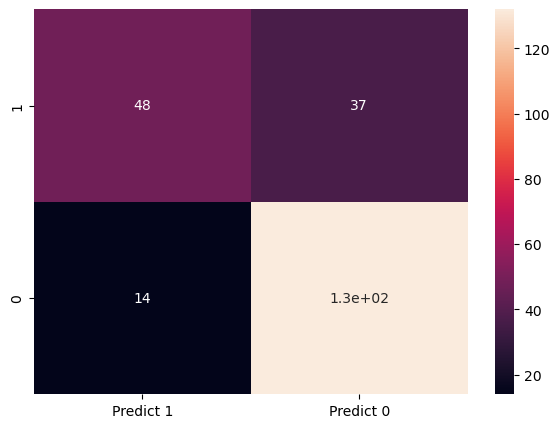

In [23]:
cm = metrics.confusion_matrix(y_test, y_predict, labels = [1,0])


df_cm = pd.DataFrame(cm, index = [i for i in ["1", "0"]],
                    columns= [i for i in ["Predict 1", "Predict 0"]])


plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot = True);

    # 48 are predicted correctly where as 37 are predicted wrong
          for Predict 1:
            48 = ✅ Right prediction
            37 = ❌ Wrong Prediction
          
          For Predict 0:
            13X10^2 = ✅ Right prediction
            14 = ❌ Wrong Prediction

## Naive Bayes Algorithm

In [26]:
from sklearn.naive_bayes import GaussianNB #Using Gaussian algorithm for Naive Bayes

model_ = GaussianNB() #Initializing our Algo

model_.fit(x_train,y_train) #bild the model

GaussianNB()

In [29]:
train_predicaion = model_.predict(x_train)
train_predicaion

array([1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0,
       1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0,
       0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1,
       1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0,
       0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1,
       0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0,
       0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0,
       1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0,

In [33]:
model_.score(x_train, y_train)*100 

73.9292364990689

In [34]:
model_.score(x_test, y_test)*100

77.05627705627705

In [37]:
test_predict = model_.predict(x_test)
test_predict

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0,
       0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0,
       1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0,
       1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1,
       1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0], dtype=int64)

# Confusion Matrix

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

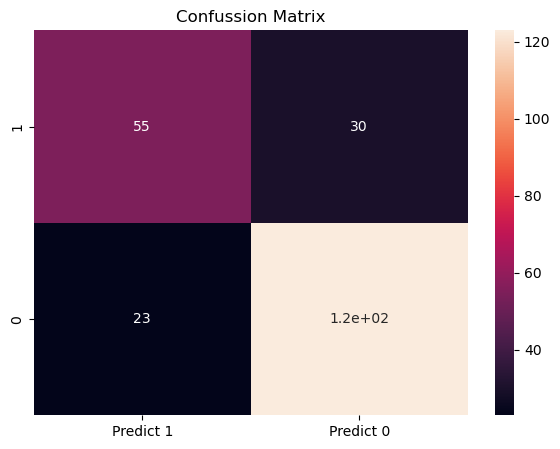

In [43]:
cm = metrics.confusion_matrix(y_test, test_predict, labels = [1,0])


df_cm = pd.DataFrame(cm, index = [i for i in ["1", "0"]],
                    columns= [i for i in ["Predict 1", "Predict 0"]])


plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot = True);

plt.title('Confussion Matrix');

In [48]:
from sklearn.metrics import classification_report

print("Classification Report:")
print(metrics.classification_report(y_test, test_predict, labels = [1,0]))

Classification Report:


<IPython.core.display.Javascript object>

              precision    recall  f1-score   support

           1       0.71      0.65      0.67        85
           0       0.80      0.84      0.82       146

    accuracy                           0.77       231
   macro avg       0.75      0.74      0.75       231
weighted avg       0.77      0.77      0.77       231

